# Polynomial Regression

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [22]:
np.random.seed(24)

Define the polynomial function.

In [3]:
x = 4*np.random.rand(200, 1) - 2

In [4]:
y = 2*pow(x, 2) + 3*x + 7 + np.random.randn(200, 1)

Text(0, 0.5, 'y')

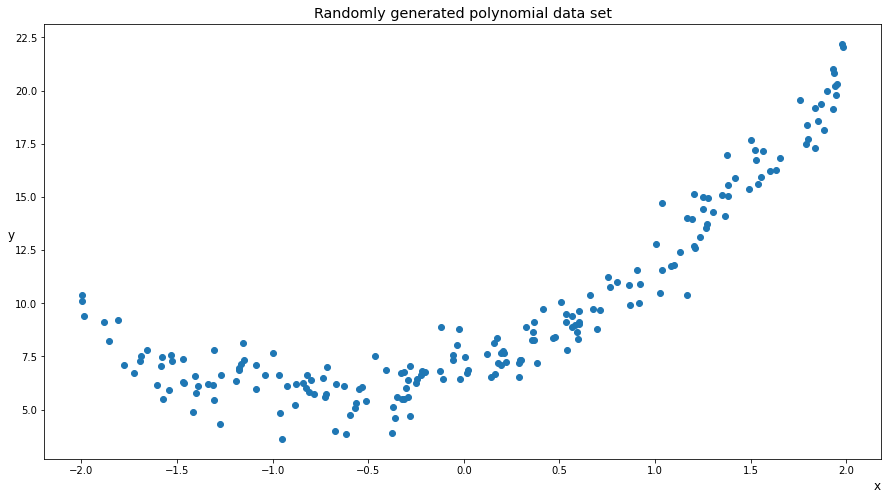

In [5]:
plt.figure(figsize=(15,8))
plt.title('Randomly generated polynomial data set', size='x-large')
plt.scatter(x, y)
plt.xlabel('x', loc='right', size='large')
plt.ylabel('y', rotation=0, size='large')

Polynomial Regression with numpy.

Calculate vector of coefficients.

In [6]:
coef = np.polyfit(x.reshape(200), y.reshape(200), 2)

In [7]:
coef

array([2.02425593, 2.97507334, 6.87365715])

Construct the polynomial function.

In [8]:
pf = np.poly1d(coef)

In [9]:
print(pf)

       2
2.024 x + 2.975 x + 6.874


Let's test it and print the results.

In [10]:
x_test = np.linspace(-2, 2, 200).reshape(200, 1)

In [11]:
y_test = coef[0]*pow(x_test, 2)+coef[1]*x_test+coef[2]

In [12]:
df = pd.DataFrame(y_test, columns=['y'])
df['x'] = x_test

In [13]:
df

,y,x
0,9.020534,-2.000000
1,8.918398,-1.979899
2,8.817898,-1.959799
3,8.719034,-1.939698
4,8.621805,-1.919598
...,...,...
195,20.043694,1.919598
196,20.260524,1.939698
197,20.478990,1.959799
198,20.699091,1.979899


Text(0, 0.5, 'y')

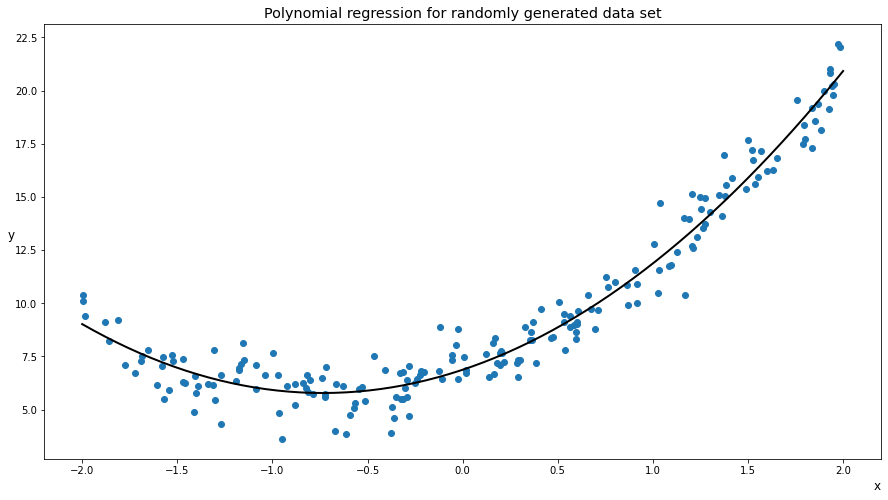

In [14]:
plt.figure(figsize=(15,8))
plt.title('Polynomial regression for randomly generated data set', size='x-large')
plt.scatter(x, y)
sns.lineplot(data=df, x='x', y='y', color='black', linewidth=2)
plt.xlabel('x', loc='right', size='large')
plt.ylabel('y', rotation=0, size='large')

Polynomial Regression with sklearn. First the PolynomialFeatures is used to add extra feature for x, i.e. x^2. Then the calculation is done by LinearRegression.

In [19]:
poly_f = PolynomialFeatures(degree=2, include_bias=False)
x_pf = poly_f.fit_transform(x)

In [20]:
x_pf

array([[ 7.65627053e-01,  5.86184784e-01],
       [-1.17330779e+00,  1.37665118e+00],
       [-1.30426367e+00,  1.70110372e+00],
       [-1.47044173e+00,  2.16219888e+00],
       [-1.85714686e+00,  3.44899444e+00],
       [ 1.34778707e+00,  1.81652998e+00],
       [ 1.52570978e+00,  2.32779033e+00],
       [-2.80030975e-01,  7.84173471e-02],
       [-1.69197503e+00,  2.86277949e+00],
       [ 1.12778978e+00,  1.27190978e+00],
       [ 1.97559081e+00,  3.90295905e+00],
       [ 1.02571059e+00,  1.05208221e+00],
       [-1.17513126e+00,  1.38093349e+00],
       [ 1.52075899e+00,  2.31270789e+00],
       [ 1.79477717e+00,  3.22122510e+00],
       [-1.99410606e+00,  3.97645898e+00],
       [-1.08355605e-01,  1.17409371e-02],
       [ 1.95201937e+00,  3.81037961e+00],
       [ 1.95974865e-01,  3.84061479e-02],
       [ 5.32506366e-01,  2.83563030e-01],
       [ 5.08502434e-01,  2.58574725e-01],
       [ 1.78902137e+00,  3.20059745e+00],
       [-2.17885032e-02,  4.74738871e-04],
       [-1.

Now let's use the LinearRegression to get the results.

In [30]:
l_reg = LinearRegression()
l_reg.fit(x_pf, y)

LinearRegression()

In [31]:
l_reg.intercept_, l_reg.coef_

(array([6.87365715]), array([[2.97507334, 2.02425593]]))

In [38]:
x_test_poly = poly_f.transform(x_test)
y_pred = l_reg.predict(x_test_poly)

Text(0, 0.5, 'y')

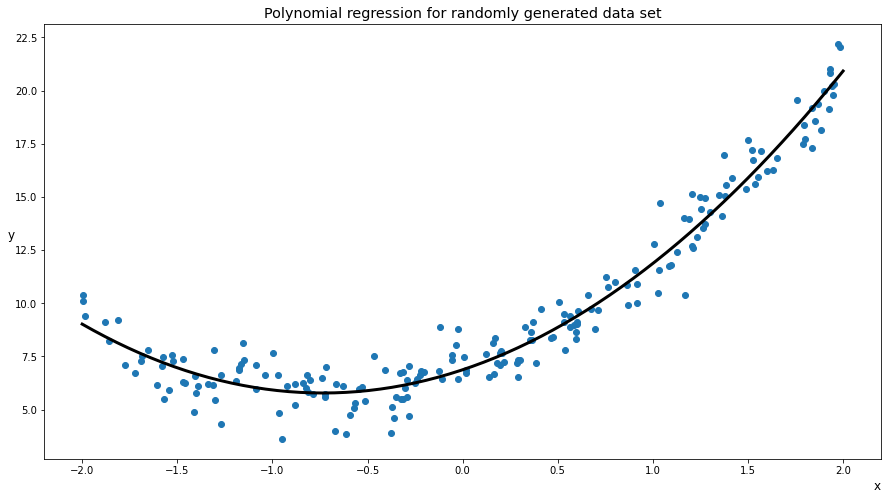

In [40]:
plt.figure(figsize=(15,8))
plt.title('Polynomial regression for randomly generated data set', size='x-large')
plt.scatter(x, y)
plt.plot(x_test, y_pred, color='black', linewidth=3)
plt.xlabel('x', loc='right', size='large')
plt.ylabel('y', rotation=0, size='large')